In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')  


In [4]:
df=pd.read_csv("/content/churn_prediction_simple.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [5]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [12]:

df.dropna()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [14]:

x=df.drop(columns=['churn','customer_id'])
y=df['churn']

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit(x)

In [16]:
scaled_x=sc.transform(x)

In [17]:
scaled_x.shape

(22067, 19)

In [18]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_x,y ,train_size=0.8,stratify=y)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((17653, 19), (17653,), (4414, 19), (4414,))

In [19]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier=dtc(class_weight='balanced')      # each calss get equal significance irrespective of the uneven dist 
classifier=dtc()


In [20]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [21]:
predicted_values.shape

(17653,)

##evaluation matrix

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))        #overfitting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [23]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))           #underfitting

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      3559
           1       0.43      0.48      0.45       855

    accuracy                           0.77      4414
   macro avg       0.65      0.66      0.65      4414
weighted avg       0.79      0.77      0.78      4414



In [24]:

!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=classifier,out_file='tree_viz',max_depth=None, feature_names = x.columns,label=None,impurity=False)

In [ ]:
from graphviz import render
render(filepath='tree_viz',format='png',engine='neato')

'tree_viz.png'

##hyper parameter tunning

##1 max depth

In [25]:
classifier=dtc()
print(classifier.fit(x_train,y_train))

DecisionTreeClassifier()


In [26]:
from sklearn.metrics import f1_score

In [27]:
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)

  predict=model.predict(x1)
  f1=f1_score(y1,predict)

  predict=model.predict(x2)
  f2=f1_score(y2,predict)

  return f1,f2

In [28]:

def effect(train_score,test_score,x_axis,title):
  plt.figure(figsize=(5,5),dpi=100  )
  plt.plot(x_axis,train_score,color='red',label='train_score')
  plt.plot(x_axis,test_score,color='blue',label='test_score')
  plt.title(title)
  plt.legend()
  plt.xlabel('parameter_value')
  plt.ylabel('f1_score')
  plt.show()

In [32]:
max_depth=[i for i  in range(1,50)]
test=[]
train=[]

for i in max_depth:
  model=dtc(class_weight='balanced' ,max_depth=i,random_state=34)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

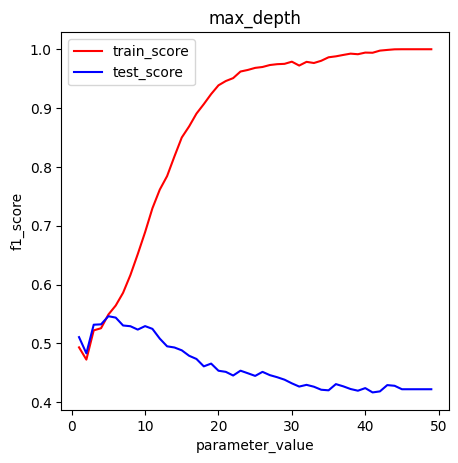

In [33]:
effect(train,test,max_depth,'max_depth' )


##2 min sample split   default set to 2

In [34]:
min_sample_split=[i for i in range(2,25000,25)]
train=[]
test=[]

for i in min_sample_split:
  model=dtc(class_weight='balanced',min_samples_split=i,random_state=54)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

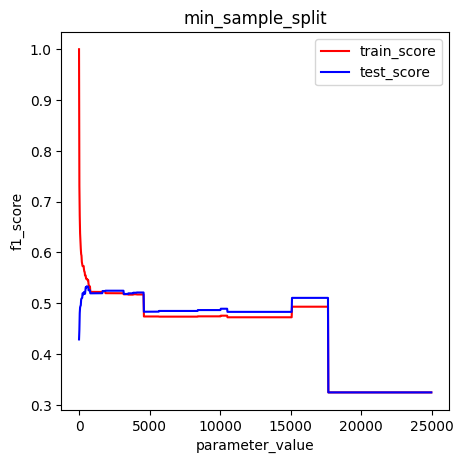

In [35]:
effect(train,test,min_sample_split,'min_sample_split')

##3 max leaf nodes

In [39]:
max_leaf_node=[i for i in range(2,150,10)]
train=[]
test=[]

for i in max_leaf_node:
  model=dtc(class_weight='balanced',max_leaf_nodes=i,random_state=54)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)


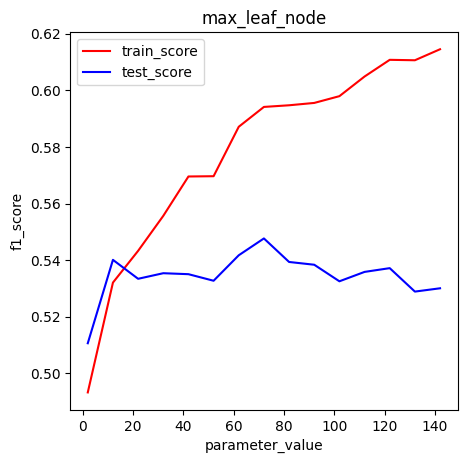

In [40]:
effect(train,test,max_leaf_node,'max_leaf_node')

## evaluation with tuned parameters

In [46]:
model=dtc(max_depth=8,min_samples_split=900,max_leaf_nodes=19)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=19, min_samples_split=900)

In [47]:
pred_values=model.predict(x_train)

In [48]:
pred_values.shape

(17653,)

In [49]:
print(classification_report(y_train,pred_values))  

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     14234
           1       0.69      0.38      0.49      3419

    accuracy                           0.85     17653
   macro avg       0.78      0.67      0.70     17653
weighted avg       0.83      0.85      0.83     17653



In [51]:
pred_values1=model.predict(x_test)

In [52]:
print(classification_report(y_test,pred_values1))       #increase in accuracy from 77 to 85% 

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3559
           1       0.70      0.40      0.51       855

    accuracy                           0.85      4414
   macro avg       0.79      0.68      0.71      4414
weighted avg       0.84      0.85      0.83      4414



In [44]:
#important features
feature_imp=pd.Series(model.feature_importances_,index=x.columns)
k=feature_imp.sort_values()


In [45]:
k

gender                            0.002737
customer_nw_category              0.002846
dependents                        0.004434
occupation                        0.005174
days_since_last_transaction       0.009166
age                               0.015139
city                              0.015703
branch_code                       0.020738
previous_month_end_balance        0.024110
previous_month_credit             0.024132
vintage                           0.029756
current_month_credit              0.031462
current_month_balance             0.033357
average_monthly_balance_prevQ2    0.046970
previous_month_debit              0.052942
previous_month_balance            0.058519
current_month_debit               0.078173
average_monthly_balance_prevQ     0.085151
current_balance                   0.459488
dtype: float64